# Simulate Variance of PnL

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
N_simulations = 100000  # Number of simulations
dt = 0.001  # Time step

np.random.seed(42)

def simulate_brownian_motion_boundary():
    W = 0  # Initial value of the process
    t = 0  # Initial time
    path = [W]
    
    while abs(W) < 1:
        dW = np.sqrt(dt) * np.random.randn()  # Brownian increment
        W += dW
        t += dt
        path.append(W)
    
    return W, t

# Simulate and calculate E[(W_tau^2 - tau)^2]
results = []
taus = []
for _ in range(N_simulations):
    W_tau, tau = simulate_brownian_motion_boundary()
    value = (W_tau**2 - tau)**2
    results.append(value)
    

# Compute the expectation
E_W_tau_squared_minus_tau_squared = np.mean(results)

# Display the result
print(f"Estimated E[(W_tau^2 - tau)^2]: {E_W_tau_squared_minus_tau_squared:.5f}")


Estimated E[(W_tau^2 - tau)^2]: 0.71519


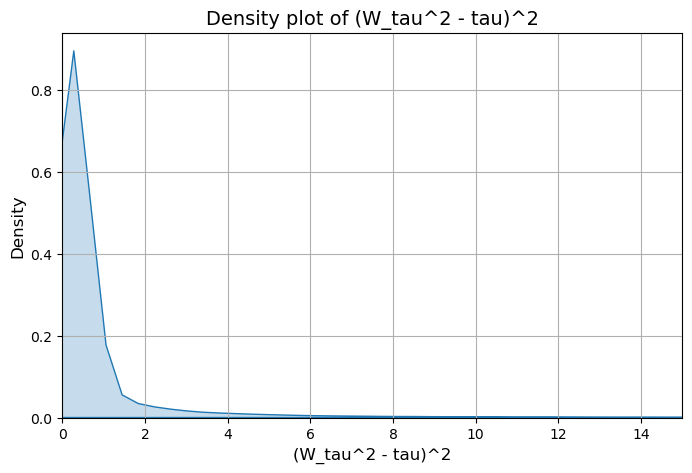

In [8]:
import seaborn as sns

# Plot density of the results
plt.figure(figsize=(8, 5))
sns.kdeplot(results, bw_adjust=1.5, fill=True)
plt.title("Density plot of (W_tau^2 - tau)^2", fontsize=14)
plt.xlabel("(W_tau^2 - tau)^2", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xlim(0, 15)
plt.grid(True)
plt.show()


# Simulation on Different Hedging Strategies